# Installing Libraries

Before starting the EDA process, lets install all required Libraries onto the system using the following commands
```bash
pip install pandas
pip install matplotlib
```

# Importing Packages and Datasets
Let's import all the packages required for our EDA process as well as the Datasets required for the EDA process

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("datasets/Dataset_small.csv")

# Data Exploration
Explore how the data is structured and analyze how it looks like

In [6]:
df.head()

,transaction_description,category,country,currency
0,Mobile Center TXN797664,Utilities & Services,USA,USD
1,Megabus Online,Transportation,UK,GBP
2,Mobile Hotspot Online - Weekday,Utilities & Services,AUSTRALIA,AUD
3,PNC Bank - INDIA (Digital Wallet),Financial Services,INDIA,INR
4,Cinema - UK - Holiday,Entertainment & Recreation,UK,GBP


In [7]:
df.shape

(200000, 4)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   transaction_description  200000 non-null  str  
 1   category                 200000 non-null  str  
 2   country                  200000 non-null  str  
 3   currency                 200000 non-null  str  
dtypes: str(4)
memory usage: 14.5 MB


In [9]:
df.isnull().sum()

transaction_description    0
category                   0
country                    0
currency                   0
dtype: int64

In [11]:
print("Number of unique categories:", df['category'].nunique())
df['category'].value_counts().head(15)

Number of unique categories: 10


category
Healthcare & Medical          20183
Utilities & Services          20093
Shopping & Retail             20029
Financial Services            20012
Income                        19998
Transportation                19995
Entertainment & Recreation    19973
Charity & Donations           19943
Government & Legal            19897
Food & Dining                 19877
Name: count, dtype: int64

In [12]:
df['text_length'] = df['transaction_description'].apply(lambda x: len(str(x).split()))
df['text_length'].describe()

count    200000.000000
mean          3.080795
std           1.487080
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          11.000000
Name: text_length, dtype: float64

In [15]:
for cat in df['category'].unique():
    print(f"\nCategory: {cat}")
    print(df[df['category'] == cat]['transaction_description'].head(3))


Category: Utilities & Services
0             Mobile Center TXN797664
2     Mobile Hotspot Online - Weekday
13                         WOW Online
Name: transaction_description, dtype: str

Category: Transportation
1                 Megabus Online
6                         United
32    Toll - AUSTRALIA TXN377046
Name: transaction_description, dtype: str

Category: Financial Services
3     PNC Bank - INDIA (Digital Wallet)
7                              Transfer
31            Community Bank #3274 - UK
Name: transaction_description, dtype: str

Category: Entertainment & Recreation
4     Cinema - UK - Holiday
8      Hulu #5061 TXN363507
14            Orange Theory
Name: transaction_description, dtype: str

Category: Healthcare & Medical
5     NYU Langone #9471 Hospital
9                    X-Ray #8565
30               Blood Test - UK
Name: transaction_description, dtype: str

Category: Food & Dining
10     Firehouse Subs #7300 - CANADA
50    Zaxby's #3457 (Digital Wallet)
65             Sa

# Visualizations

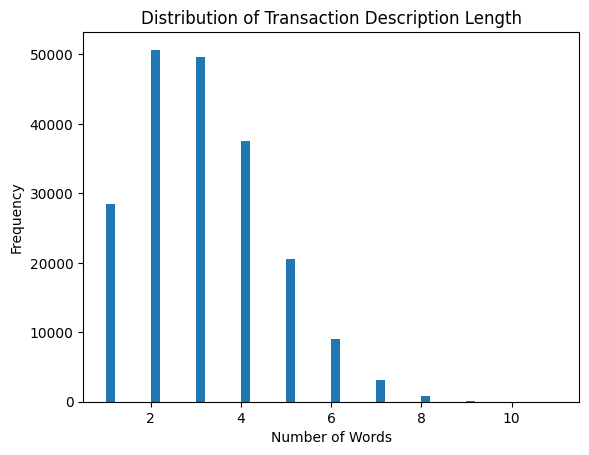

In [13]:
plt.hist(df['text_length'], bins=50)
plt.title("Distribution of Transaction Description Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Findings from the Dataset

Upon inspecting and analyzing the Dataset, we have come to the following findings:

- **Dataset has the perfoect class balance**: Each category has approx. 20000 samples each
- **Contains exactly 10 Categories**: Having clean and managable categories help in easier training
- **True short-text Dataset**: The Dataset has a mean text length of aprox. 3
- **Text Characteristics**: Some of the text has long non-meaningful text like `TXN363507` or `#7300`, which should be cleaned

